<a href="https://colab.research.google.com/github/manuel-suarez/curso_itc_nn/blob/soluciones/D%C3%ADa_4_Redes_Neuronales_con_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelos

### Primer ejemplo
[Guia inicial de TensorFlow 2.0 para principiantes](https://www.tensorflow.org/tutorials/quickstart/beginner)

#### Importación de las librerías

In [62]:
import tensorflow as tf
tf.__version__

'2.8.2'

#### Preparación de los datos
[Base de datos MNIST](http://yann.lecun.com/exdb/mnist/)

In [79]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [80]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
x_train[0].shape
x_train[0]
import matplotlib.pyplot as plt
print(y_train[0])
plt.imshow(x_train[0], cmap='gray')
plt.grid(False)

print(y_train[1])
plt.figure()
plt.imshow(x_train[1], cmap='gray')
plt.grid(False)

In [ ]:
fig, ax = plt.subplots(4, 4, figsize = (6,6))

for i in range(4):
  for j in range(4):
    ax[i,j].imshow(x_train[4*i+j], cmap='gray')
    ax[i,j].grid(False)

plt.plot()

In [94]:
y_train[0:16]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7], dtype=uint8)

#### Construcción y compilación del modelo


*   [Modelos](https://keras.io/api/models/)
*   [Capas](https://keras.io/api/layers/)
*   [Optimizadores](https://keras.io/api/optimizers/) [(Material adicional)](https://analyticsindiamag.com/guide-to-tensorflow-keras-optimizers/)
*   [Funciones de pérdida](https://keras.io/api/losses/) [(Material adicional)](https://neptune.ai/blog/keras-loss-functions)
*   [Métricas](https://keras.io/api/metrics/) [(Material adicional)](https://neptune.ai/blog/keras-metrics)
*   [Activaciones](https://keras.io/api/layers/activations/)

In [101]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [102]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


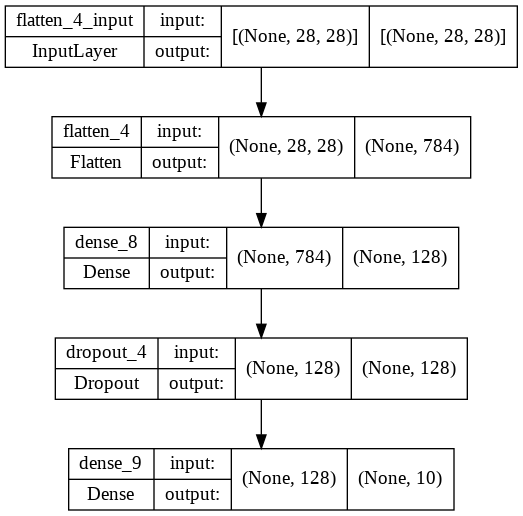

In [103]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

#### Entrenamiento y evaluación


*   [Keras training](https://keras.io/api/models/model_training_apis/) 
*   [GPU](https://www.run.ai/guides/gpu-deep-learning)
*   [CPU vs GPU vs TPU: Understanding the Difference Between Them](https://serverguy.com/comparison/cpu-vs-gpu-vs-tpu/)
*   [CUDA](https://developer.nvidia.com/cuda-zone)
*   [CuPy](https://cupy.dev/)



In [104]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2999 - accuracy: 0.9135
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1423 - accuracy: 0.9582
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1078 - accuracy: 0.9674
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0890 - accuracy: 0.9724
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0743 - accuracy: 0.9774
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0656 - accuracy: 0.9796
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0585 - accuracy: 0.9814
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0526 - accuracy: 0.9829
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0476 - accuracy: 0.9843
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.043

In [ ]:
history.history

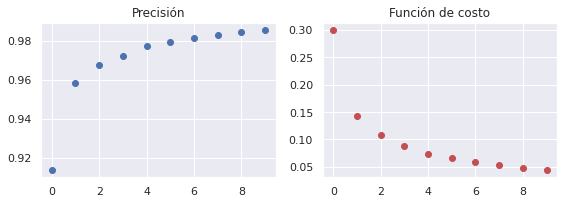

In [118]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(history.history['accuracy'], 'bo')
ax[0].set_title('Precisión')
ax[1].plot(history.history['loss'], 'ro')
ax[1].set_title('Función de costo')
fig.tight_layout()

In [119]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0669 - accuracy: 0.9804 - 566ms/epoch - 2ms/step


[0.0669260248541832, 0.980400025844574]

#### [Visualización de la matriz de confusión](http://personal.cimat.mx:8181/~mrivera/cursos/aprendizaje_profundo/introduccion_convnets/introduccion_convnets.html)

In [120]:
predictions = model.predict(x_test)

In [ ]:
type(predictions)
predictions.shape

In [ ]:
predictions[100].shape

In [ ]:
print(["{p:.12f}".format(p=p) for p in predictions[1000]])

In [ ]:
y_test[1000]

In [ ]:
plt.imshow(x_test[1000])

In [ ]:
y_test

In [151]:
import numpy as np
p_test = [np.argmax(p) for p in predictions]

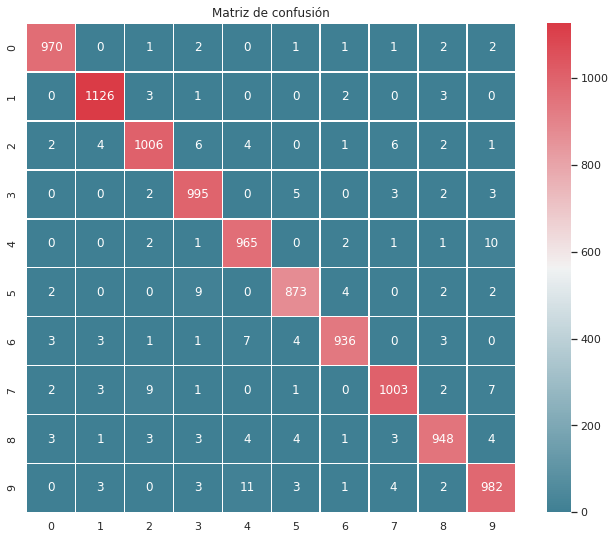

In [155]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

C = confusion_matrix(y_test, p_test)
f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True, 
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de confusión')
plt.show()


### [Clasificación de imágenes básica](https://www.tensorflow.org/tutorials/keras/classification)

### [Clasificación de texto básica](https://www.tensorflow.org/tutorials/keras/text_classification)

### [Clasificación de texto con TensorFlow](https://www.tensorflow.org/tutorials/keras/text_classification_with_hub)

### [Regresión](https://www.tensorflow.org/tutorials/keras/regression)

### [Sobreajuste y subajuste](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)

### [Guardado de modelos](https://www.tensorflow.org/tutorials/keras/save_and_load)